In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


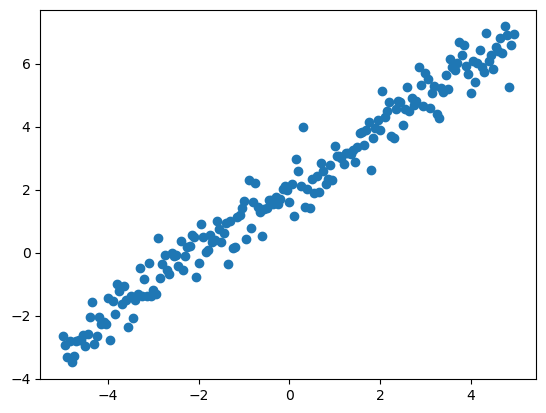

In [2]:
nb_samples = 200

X = np.arange(-5, 5, 0.05)

Y = X + 2

Y += np.random.normal(0.0, 0.5, size = nb_samples)

plt.scatter(X, Y)
plt.show()


In [3]:
# functions
def loss(v):
    """_summary_

    Args:
        v (np_array): numpy array containing fitted parameters 

    Returns:
        scalar: summed loss
    """
    e = 0.0
    for i in range(nb_samples):
        e += np.square(v[0] + v[1] * X[i] - Y[i])
    return 0.5 * e
    
    
def gradient(v):
    g = np.zeros(shape=2)
    for i in range(nb_samples):
        g[0] += (v[0] + v[1] * X[i] - Y[i])
        g[1] += (v[0] + v[1] * X[i] - Y[i] * X[i])
    return g




In [4]:
result=minimize(fun=loss, x0=[0.0, 0.0], jac=gradient, method='Powell')
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 24.4987839489242
       x: [ 2.007e+00  9.837e-01]
     nit: 3
   direc: [[ 0.000e+00  1.000e+00]
           [ 1.844e-06  5.533e-09]]
    nfev: 103


/Users/johannabayer/anaconda3/envs/ML_env/lib/python3.11/site-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
